# 0. Pytorch Fundamentals

Author: Alejandro Meza Tudela

In [ ]:
import torch
print(torch.__version__)

2.3.0+cu121


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print('Pandas', pd.__version__)
print('Numpy', np.__version__)

Pandas 2.0.3
Numpy 1.25.2


In [ ]:
print('This is the start for learning Pytorch!')

This is the start for learning Pytorch!


In [ ]:
!nvidia-smi #access the default GPU

/bin/bash: line 1: nvidia-smi: command not found


## Introduction to tensors

Form of representing multi-dimensional data for feeding our model

In [ ]:
#scalar torch.tensor:allows to us to create tensors
t1 = torch.tensor(4)
t1

tensor(4)

In [ ]:
t1.ndim #dimensions

0

In [ ]:
t1.item() #item

4

In [ ]:
#vector
vector = torch.tensor([7,7])
vector

print(vector.ndim)
print(vector.shape)

1
torch.Size([2])


In [ ]:
#matrix
MATRIX = torch.tensor([[7,8],
                       [9,10]])
print (MATRIX)
print(MATRIX.ndim)
print(MATRIX.shape)

print()
print(MATRIX[0])
print(MATRIX[1])

tensor([[ 7,  8],
        [ 9, 10]])
2
torch.Size([2, 2])

tensor([7, 8])
tensor([ 9, 10])


In [ ]:
#TENSOR
TENSOR = torch.tensor([[[1,2,3],
                        [3,6,9],
                        [2,4,5]]])
print(TENSOR)
print(TENSOR.ndim)
print(TENSOR.shape)

#Meaning: is that we have only have 1 of 3x3 element inside the tensor--> something like a vector of matrix

tensor([[[1, 2, 3],
         [3, 6, 9],
         [2, 4, 5]]])
3
torch.Size([1, 3, 3])


In [ ]:
print(TENSOR[0])

tensor([[1, 2, 3],
        [3, 6, 9],
        [2, 4, 5]])


In [ ]:
TENSOR = torch.tensor([[[1,2,3],
                        [3,6,9],
                        [2,4,5]],
                       [[1,2,3],
                        [3,6,9],
                        [2,4,5]]])
print(TENSOR)
print(TENSOR.ndim)
print(TENSOR.shape)

tensor([[[1, 2, 3],
         [3, 6, 9],
         [2, 4, 5]],

        [[1, 2, 3],
         [3, 6, 9],
         [2, 4, 5]]])
3
torch.Size([2, 3, 3])


### RANDOM TENSORS

Why random tensors?

Random tensors are very important because the way many NN learn is that they start with tensors full of random numbers, and then adjust these random numbers to better represent the data. For example, the weights of the Neural Network.

- start with random numbers --> look at data --> update (repeat)

In [ ]:
#random tensors
RANDOM = torch.rand(3,4)
print(RANDOM)
print(RANDOM.ndim)
print(RANDOM.shape)

tensor([[0.1467, 0.4312, 0.6093, 0.5851],
        [0.9111, 0.9241, 0.8137, 0.4633],
        [0.8967, 0.0755, 0.0075, 0.4354]])
2
torch.Size([3, 4])


In [ ]:
RANDOM = torch.rand(1,3,4)
print(RANDOM)
print(RANDOM.ndim)
print(RANDOM.shape)

tensor([[[0.8474, 0.5247, 0.7848, 0.6762],
         [0.5917, 0.1826, 0.0951, 0.3903],
         [0.3798, 0.1769, 0.2182, 0.9823]]])
3
torch.Size([1, 3, 4])


**Representation of images**

In [ ]:
#create a random tensor with similar size of an image
RANDOM = torch.rand(size=(3,224,224)) #height, width, color channels (RGB)
#print(RANDOM)
print(RANDOM.ndim)
print(RANDOM.shape)

3
torch.Size([3, 224, 224])


In [ ]:
#we have 3 matrix of 224x244 for every color channel
print(RANDOM)

tensor([[[0.4775, 0.1502, 0.1688,  ..., 0.0633, 0.9907, 0.5113],
         [0.8430, 0.6883, 0.8208,  ..., 0.0625, 0.4401, 0.2007],
         [0.0455, 0.1910, 0.3327,  ..., 0.9722, 0.0060, 0.3059],
         ...,
         [0.6687, 0.5818, 0.3913,  ..., 0.0650, 0.3975, 0.7694],
         [0.5119, 0.5758, 0.4029,  ..., 0.0653, 0.2445, 0.2170],
         [0.1068, 0.5104, 0.9515,  ..., 0.8723, 0.5659, 0.3805]],

        [[0.5544, 0.1401, 0.5626,  ..., 0.0157, 0.0600, 0.5629],
         [0.7036, 0.4865, 0.1780,  ..., 0.0413, 0.8171, 0.7750],
         [0.0125, 0.2349, 0.7188,  ..., 0.2132, 0.6912, 0.6942],
         ...,
         [0.7403, 0.8831, 0.4258,  ..., 0.5312, 0.2232, 0.6482],
         [0.2500, 0.5688, 0.9476,  ..., 0.4678, 0.1368, 0.8012],
         [0.2793, 0.3776, 0.1285,  ..., 0.8066, 0.2226, 0.4117]],

        [[0.7522, 0.5676, 0.9702,  ..., 0.9413, 0.9233, 0.4031],
         [0.6005, 0.1862, 0.7020,  ..., 0.6685, 0.8746, 0.4899],
         [0.7406, 0.2924, 0.1009,  ..., 0.3734, 0.9444, 0.

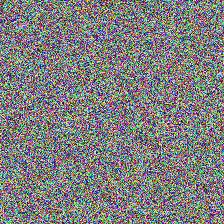

In [ ]:
#Its moment to see our random image!!

import cv2
from google.colab.patches import cv2_imshow  # Import cv2_imshow for displaying images in Colab

# Convert PyTorch tensor to NumPy array
image_np = RANDOM.numpy()

# Transpose dimensions from (3, 224, 224) to (224, 224, 3) BASICALLY we were readjusting dimensions!!
image_np = np.transpose(image_np, (1, 2, 0))

# Scale pixel values to 0-255 (assuming the tensor values are already between 0 and 1)
image_np = (image_np * 255).astype(np.uint8)

# Display using cv2_imshow for Colab
cv2_imshow(image_np)
cv2.destroyAllWindows()

## Zeros and Ones tensor

In [ ]:
#you can use this to perform a mask operation over the image/original tensor
zeros = torch.zeros(size=(3,4))
print(zeros)
print(zeros.ndim)
print(zeros.shape)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
2
torch.Size([3, 4])


In [ ]:
ones = torch.ones(size=(3,4))
print(ones)
print(ones.ndim)
print(ones.shape)
print(ones.dtype)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
2
torch.Size([3, 4])
torch.float32


Normally, the data type in tensors is float32.

## Range of tensors and tensors-like

In [ ]:
RANGE=torch.arange(start=0,end=100,step=7)
print(RANGE)
print(RANGE.ndim)
print(RANGE.shape)

tensor([ 0,  7, 14, 21, 28, 35, 42, 49, 56, 63, 70, 77, 84, 91, 98])
1
torch.Size([15])


In [ ]:
#creating tensors like (reference another tensor size and change the elements)
ones = torch.ones_like(input=RANGE)
print(ones)
print(ones.ndim)
print(ones.shape)

zeros = torch.zeros_like(input=RANGE)
print(zeros)
print(zeros.ndim)
print(zeros.shape)

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
1
torch.Size([15])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
1
torch.Size([15])


## Tensor data types

Common erros related to tensors:
- tensors not right datatype
- tensors not right shape
- tensors not on the right device

In [ ]:
#default data
float_32_tensor = torch.tensor([3.0,6.0,9.0],
                               dtype=None, #data type
                               device=None, #device on which to store the tensor
                               requires_grad=False #whether to track gradients or not
                               )
print(float_32_tensor)
print(float_32_tensor.dtype)

tensor([3., 6., 9.])
torch.float32


In [ ]:
float_16_tensor = torch.tensor([3.0,6.0,9.0],dtype=torch.float16)
print(float_16_tensor)
print(float_16_tensor.dtype)

tensor([3., 6., 9.], dtype=torch.float16)
torch.float16


In [ ]:
float_64_tensor = torch.tensor([3.0,6.0,9.0],dtype=torch.float64)
print(float_64_tensor)
print(float_64_tensor.dtype)

tensor([3., 6., 9.], dtype=torch.float64)
torch.float64


In [ ]:
float_16_tensor*float_64_tensor

tensor([ 9., 36., 81.], dtype=torch.float64)

## Tensor properties


In [ ]:
'''
  Since the most common errors are:
  1. Tensors not right datatype
  2. Tensors not right shape
  3. Tensors not on the right device
'''
float_64_tensor = torch.tensor([3.0,6.0,9.0],dtype=torch.float64)
print(float_64_tensor.dtype)
print(float_64_tensor.shape)
print(float_64_tensor.device)
print(float_64_tensor.size())

torch.float64
torch.Size([3])
cpu
torch.Size([3])


## Manipulating tensors

Tensor operations include:
- Addition
- Substraction
- Multiplication (element-wise)
- Division
- Matrix multiplication

In [ ]:
# addition
TENSOR = torch.tensor([1,2,3])
TENSOR += 10
print(TENSOR)

tensor([11, 12, 13])


In [ ]:
# multiplication

#By elements
TENSOR = torch.tensor([1,2,3])
TENSOR *= 10
print(TENSOR)

tensor([10, 20, 30])


In [ ]:
# substract
TENSOR = torch.tensor([1,2,3])
TENSOR -= 10
print(TENSOR)

tensor([-9, -8, -7])


In [ ]:
#in-build functions
TENSOR = torch.tensor([1,2,3])
TENSOR = torch.mul(TENSOR,10)
print(TENSOR)

TENSOR = torch.tensor([1,2,3])
TENSOR = torch.add(TENSOR,10)
print(TENSOR)

tensor([10, 20, 30])
tensor([11, 12, 13])


## Matrix multiplication

There are 2 main ways of performing multiplication in NN and DL:

- Element wise multiplication
- Matrix multiplication (probably the most common operation in NN) --> dot product

Some basic rules:
- The inner dimensions must match
- The resulting matrix has the shape of the **outer dimensions**


In [ ]:
TENSOR1 = torch.tensor([[1,2,3],
                        [4,5,6]])

TENSOR2 = torch.tensor([[7,8],
                        [9,10],
                        [11,12]])

#matmul module allows to make a matrix operation: f,c * f,c where c1=f2 and result dimensions are f1,c2
result = torch.matmul(TENSOR1,TENSOR2)
print(result)

tensor([[ 58,  64],
        [139, 154]])


In [ ]:
TENSOR1 = torch.rand(2,3)

TENSOR2 = torch.rand(3,7)

#matmul module allows to make a matrix operation: f,c * f,c where c1=f2 and result dimensions are f1,c2
result = torch.matmul(TENSOR1,TENSOR2)
print(result)

tensor([[0.8466, 1.9636, 1.5225, 2.0233, 0.7964, 0.7383, 1.2037],
        [0.1764, 0.4134, 0.3158, 0.4170, 0.1730, 0.1342, 0.2575]])


## Dealing with tensor shapes errors

In [ ]:
a = torch.rand(3,2)
b = torch.rand(2,3)
torch.matmul(a,b)

#however, if we try to to do this.. RULE NUMBER 1 IS NOT SATISFIED
a = torch.rand(3,2)
b = torch.rand(4,3)
torch.matmul(a,b)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x2 and 4x3)

To fix our tensor shape issues, we are able to **transpose** the dimensions of this tensor.

In [ ]:
a = torch.rand(3,2)
print(a.shape)
a.T.shape #transpose the original tensor

torch.Size([3, 2])


torch.Size([2, 3])

**Aggregation functions**

In [ ]:
a = torch.rand(3,2)
print(a)
print(a.sum())
print(a.sum().item())
print(a.mean())
print(a.mean().item())
print(a.min())
print(a.max())

tensor([[0.0925, 0.1491],
        [0.2624, 0.4917],
        [0.3622, 0.9286]])
tensor(2.2865)
2.286506175994873
tensor(0.3811)
0.3810843527317047
tensor(0.0925)
tensor(0.9286)


Find the position of the minimum and max value:

In [ ]:
a = torch.rand(1,10)
print(a)
print(a.argmin())
print(a.argmax())

tensor([[0.8623, 0.5888, 0.0460, 0.0803, 0.0304, 0.9663, 0.3291, 0.2997, 0.6700,
         0.2273]])
tensor(4)
tensor(5)


## Reshaping ,vector stacking, squeezing and unsquezzing

- Reshaping: reshapes an input tensor to a define shape.
- View: return a view of an input tensor of certain shape but keep the same memory as the original tensor.
- Stacking: combine multiple tensors on top each other (vertical or horizontal)
- Squeeze: removes all '1' dimensions from the tensor.
- Unsqueeze: add a '1' dimension to the target tensor.
- Permute: retrun a view of the input with dimensions permuted (dimensions swapped in a certain way).


In [ ]:
import torch
x = torch.arange(1.,11)
x,x.shape

(tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]), torch.Size([10]))

In [ ]:
#1) RESHAPE OPERATION
#Add an extra dimension
x_reshaped = x.reshape(2,5)
print(x_reshaped,x_reshaped.shape)

x_reshaped = x.reshape(5,2)
print(x_reshaped,x_reshaped.shape)

tensor([[ 1.,  2.,  3.,  4.,  5.],
        [ 6.,  7.,  8.,  9., 10.]]) torch.Size([2, 5])
tensor([[ 1.,  2.],
        [ 3.,  4.],
        [ 5.,  6.],
        [ 7.,  8.],
        [ 9., 10.]]) torch.Size([5, 2])


In [ ]:
#2)View operation
#change the view
z = x.view(1,10)
print(z,z.shape)

tensor([[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]]) torch.Size([1, 10])


In [ ]:
#if we change the view, the value of X will change. That's why the view of a tensor shares the same memory as the tensor itself.
#Like a pointer
z[:,0]=5
print(x)

tensor([ 5.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])


In [ ]:
#3)Stack tensors on top of each other
#dim=0 --> horizontal way
x_stacked = torch.stack([x,x,x,x],dim=0)
print(x_stacked)

tensor([[ 5.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
        [ 5.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
        [ 5.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
        [ 5.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]])


In [ ]:
#dim=1 --> vertical way
x_stacked = torch.stack([x,x,x,x],dim=1)
print(x_stacked)

tensor([[ 5.,  5.,  5.,  5.],
        [ 2.,  2.,  2.,  2.],
        [ 3.,  3.,  3.,  3.],
        [ 4.,  4.,  4.,  4.],
        [ 5.,  5.,  5.,  5.],
        [ 6.,  6.,  6.,  6.],
        [ 7.,  7.,  7.,  7.],
        [ 8.,  8.,  8.,  8.],
        [ 9.,  9.,  9.,  9.],
        [10., 10., 10., 10.]])


In [ ]:
#stack elements of vectors in a differentway
xh = torch.hstack([x,x,x,x])
print(xh)

vh = torch.vstack([x,x,x,x])
print(vh)

tensor([ 5.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.,  5.,  2.,  3.,  4.,
         5.,  6.,  7.,  8.,  9., 10.,  5.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,
         9., 10.,  5.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])
tensor([[ 5.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
        [ 5.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
        [ 5.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
        [ 5.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]])


In [ ]:
a = torch.rand(2,3)
b = torch.rand(2,3)
print(a)
print(b)
print()
horizontal_stack = torch.stack([a,b],dim=0)
print(horizontal_stack)
print()
vertical_stack = torch.stack([a,b],dim=1)
print(horizontal_stack)

tensor([[0.9435, 0.3425, 0.4136],
        [0.9065, 0.5120, 0.6457]])
tensor([[0.8419, 0.7301, 0.8885],
        [0.9929, 0.4152, 0.9997]])

tensor([[[0.9435, 0.3425, 0.4136],
         [0.9065, 0.5120, 0.6457]],

        [[0.8419, 0.7301, 0.8885],
         [0.9929, 0.4152, 0.9997]]])

tensor([[[0.9435, 0.3425, 0.4136],
         [0.9065, 0.5120, 0.6457]],

        [[0.8419, 0.7301, 0.8885],
         [0.9929, 0.4152, 0.9997]]])


In [ ]:
#4)Time to perform squeeze and unsqueeze


#Squeeze: removed single dimensions from the tensor
x = torch.zeros(1,1,1,10)
print(x)
print(x.shape)
print()
x_squeezed = x.squeeze()
print(x_squeezed)
print(x_squeezed.shape)
print('--------------------------------')
#unsqueeze: add a single dimensions to the vector
image = torch.rand(256,256)
print(image)
print(image.shape)
print()
image_unsqueezed = image.unsqueeze(dim=0)
print(image_unsqueezed)

tensor([[[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]]])
torch.Size([1, 1, 1, 10])

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
torch.Size([10])
--------------------------------
tensor([[0.6516, 0.2422, 0.3144,  ..., 0.7013, 0.9033, 0.6181],
        [0.9821, 0.4832, 0.7981,  ..., 0.7766, 0.5147, 0.4158],
        [0.9942, 0.4379, 0.8283,  ..., 0.3144, 0.8208, 0.0415],
        ...,
        [0.0437, 0.7809, 0.5167,  ..., 0.1211, 0.2592, 0.4757],
        [0.2599, 0.5415, 0.6420,  ..., 0.1076, 0.9051, 0.4688],
        [0.8352, 0.1446, 0.6515,  ..., 0.5365, 0.2408, 0.5051]])
torch.Size([256, 256])

tensor([[[0.6516, 0.2422, 0.3144,  ..., 0.7013, 0.9033, 0.6181],
         [0.9821, 0.4832, 0.7981,  ..., 0.7766, 0.5147, 0.4158],
         [0.9942, 0.4379, 0.8283,  ..., 0.3144, 0.8208, 0.0415],
         ...,
         [0.0437, 0.7809, 0.5167,  ..., 0.1211, 0.2592, 0.4757],
         [0.2599, 0.5415, 0.6420,  ..., 0.1076, 0.9051, 0.4688],
         [0.8352, 0.1446, 0.6515,  ..., 0.5365, 0.2408, 0.

In [ ]:
#So basically, when we use unsqueezed, we can add a single dimension to a target dimension
print(f"Previos target {x_squeezed}")
print(f"Previous shape {x_squeezed.shape}")
print()
print(f"New target {x_squeezed.unsqueeze(dim=0)}")
print(f"New shape {x_squeezed.unsqueeze(dim=0).shape}")
print()
print(f"New target {x_squeezed.unsqueeze(dim=1)}")
print(f"New shape {x_squeezed.unsqueeze(dim=1).shape}")

Previos target tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
Previous shape torch.Size([10])

New target tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])
New shape torch.Size([1, 10])

New target tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]])
New shape torch.Size([10, 1])


In [ ]:
#5)Permute: rearranges the dimensions of a target tensor in a specific order
x = torch.rand(2,3,4)
print(x)
print(x.shape)
print()
'''
in this case, we have re-arranged the dimensions of the elements: 3d,1d,2d
So, in our case, we will have: 4 elements, with two rows and three columns
'''
x_permuted = x.permute(1,2,0)
print(x_permuted)
print(x_permuted.shape)

tensor([[[0.7811, 0.9475, 0.7991, 0.4194],
         [0.6686, 0.1077, 0.2913, 0.7373],
         [0.6612, 0.3451, 0.5056, 0.9742]],

        [[0.5947, 0.0325, 0.2573, 0.0518],
         [0.2538, 0.8833, 0.1420, 0.3593],
         [0.9960, 0.0473, 0.0531, 0.9725]]])
torch.Size([2, 3, 4])

tensor([[[0.7811, 0.5947],
         [0.9475, 0.0325],
         [0.7991, 0.2573],
         [0.4194, 0.0518]],

        [[0.6686, 0.2538],
         [0.1077, 0.8833],
         [0.2913, 0.1420],
         [0.7373, 0.3593]],

        [[0.6612, 0.9960],
         [0.3451, 0.0473],
         [0.5056, 0.0531],
         [0.9742, 0.9725]]])
torch.Size([3, 4, 2])


In [ ]:
#in case we want to permute the dimensions of an existing image!!
x = torch.rand(size=(256,255,3))
print(x)
print(x.shape)
print()
'''
in this case, we have re-arranged the dimensions of the elements: 3d,1d,2d
So, in our case, we will have: 4 elements, with two rows and three columns
'''
x_permuted = x.permute(1,2,0)
print(x_permuted)
print(x_permuted.shape)

tensor([[[0.7566, 0.7657, 0.3593],
         [0.1969, 0.4734, 0.7091],
         [0.5670, 0.2745, 0.1197],
         ...,
         [0.6615, 0.9979, 0.5627],
         [0.2765, 0.4756, 0.2521],
         [0.3227, 0.1931, 0.4790]],

        [[0.9918, 0.9657, 0.4606],
         [0.3746, 0.8694, 0.4501],
         [0.0046, 0.3514, 0.8319],
         ...,
         [0.6630, 0.2974, 0.0510],
         [0.1247, 0.8610, 0.9073],
         [0.1611, 0.1728, 0.3926]],

        [[0.0607, 0.2630, 0.2724],
         [0.1200, 0.8734, 0.4914],
         [0.4555, 0.0689, 0.5067],
         ...,
         [0.9570, 0.2778, 0.3599],
         [0.8236, 0.4458, 0.3990],
         [0.4599, 0.1974, 0.7191]],

        ...,

        [[0.0790, 0.0188, 0.3742],
         [0.0937, 0.2728, 0.1086],
         [0.4695, 0.0473, 0.5730],
         ...,
         [0.2722, 0.4013, 0.0523],
         [0.1939, 0.0441, 0.5199],
         [0.1134, 0.0975, 0.4696]],

        [[0.7854, 0.0362, 0.8574],
         [0.0988, 0.4522, 0.9566],
         [0.

In [ ]:
#in the case we want to reasing the first element of the second matrix
x[1,0,0] = 100
print(x)

tensor([[[1.0000e+02, 7.6574e-01, 3.5932e-01],
         [1.9693e-01, 4.7337e-01, 7.0913e-01],
         [5.6701e-01, 2.7446e-01, 1.1965e-01],
         ...,
         [6.6151e-01, 9.9785e-01, 5.6270e-01],
         [2.7646e-01, 4.7565e-01, 2.5208e-01],
         [3.2270e-01, 1.9311e-01, 4.7904e-01]],

        [[1.0000e+02, 9.6565e-01, 4.6060e-01],
         [3.7459e-01, 8.6939e-01, 4.5013e-01],
         [4.5528e-03, 3.5144e-01, 8.3188e-01],
         ...,
         [6.6303e-01, 2.9736e-01, 5.0966e-02],
         [1.2471e-01, 8.6095e-01, 9.0729e-01],
         [1.6108e-01, 1.7276e-01, 3.9261e-01]],

        [[6.0726e-02, 2.6296e-01, 2.7240e-01],
         [1.2004e-01, 8.7344e-01, 4.9140e-01],
         [4.5554e-01, 6.8860e-02, 5.0666e-01],
         ...,
         [9.5705e-01, 2.7779e-01, 3.5986e-01],
         [8.2364e-01, 4.4578e-01, 3.9895e-01],
         [4.5992e-01, 1.9737e-01, 7.1907e-01]],

        ...,

        [[7.9036e-02, 1.8768e-02, 3.7422e-01],
         [9.3736e-02, 2.7280e-01, 1.0860e-01]

## Indexig (selecting data from tensors)

Indexing data with PyThorch is similar than indexing data with Numpy.

In [ ]:
#indexing --> select data from tensors
import torch
x = torch.arange(1,10).reshape(1,3,3)
print(x)
print()
print(x[0]) #first element of the multi-dimensionals element
print(x[0][0]) #first row of the first multi-dimensional element
print(x[0][0][0]) #first element of the first multi-dimensional element

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
tensor([1, 2, 3])
tensor(1)


In [ ]:
#however, there is also another same way to do things
import torch
x = torch.arange(1,10).reshape(1,3,3)
print(x)
print()
print(x[0]) #first element of the multi-dimensionals element
print(x[0,0]) #first row of the first multi-dimensional element
print(x[0,0,0]) #first element of the first multi-dimensional element

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
tensor([1, 2, 3])
tensor(1)


In [ ]:
#you can also use ':' to select ALL of the target dimension
x = torch.arange(1,10).reshape(1,3,3)
print(x)
print()
print(x[0]) #first element of the multi-dimensionals element
print(x[0,0]) #first row of the first multi-dimensional element
print(x[0,1,:]) #return all the elements of the second row

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
tensor([1, 2, 3])
tensor([4, 5, 6])


### Pythorch & numpy

Numpy is a popular scientific Python numerical library.

And because of that, Pythorch has functionality to interact with it.

* Data in numpy, want in Pythoch tensor--> torch.from_numpy(ndarray)

* Data in pythoch, want in numpy --> torch.Tensor.numpy()

In [ ]:
#numpy array to tensor
import torch
import numpy as np
array = np.arange(1.0,8.0)
#we can notice that default numpy data type is float64, but, on Pythorch, the default data type is float32
tensor = torch.from_numpy(array).type(torch.float32)
print(array)
print(tensor)

[1. 2. 3. 4. 5. 6. 7.]
tensor([1., 2., 3., 4., 5., 6., 7.])


In [ ]:
#to tensor to numpy array
x = torch.arange(1.,10)
numpy_tensor = x.numpy()
print(x,x.dtype)
print(numpy_tensor,type(numpy_tensor))

tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.]) torch.float32
[1. 2. 3. 4. 5. 6. 7. 8. 9.] <class 'numpy.ndarray'>


## Reproducibility (trying to take random out of random)

In short how NN networks learn:

- start with random numbers --> tensor operations --> update random numbers to try to make a better representation of the data --> repeat()

However, maybe sometimes we want to reproduce the random numbers.

To reduce the randomness in NN, it comes the concept of random **seed**.

Essentially what the random seed does is "flavour" the randomness.


In [ ]:
import torch

#create 2 random tensors
random_tensor_A = torch.rand(3,4)
random_tensor_B = torch.rand(3,4)

print(random_tensor_A)
print(random_tensor_B)
#apply a mask of elements
print(random_tensor_A == random_tensor_B)

tensor([[0.6744, 0.7109, 0.4467, 0.7398],
        [0.7074, 0.2502, 0.8739, 0.5344],
        [0.5351, 0.7722, 0.5964, 0.0882]])
tensor([[0.5050, 0.7701, 0.9365, 0.4082],
        [0.0770, 0.4195, 0.7143, 0.1091],
        [0.3481, 0.0194, 0.1379, 0.4466]])
tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])


In [ ]:
#lets make some random but reproducible tensors
import torch

#set random seed
torch.manual_seed(42) #each time we call a random method
random_tensor_C = torch.rand(3,4)

#set random seed
torch.manual_seed(42)#each time we call a random method
random_tensor_D = torch.rand(3,4)

print(random_tensor_C)
print(random_tensor_D)

#interesting
print(random_tensor_C == random_tensor_D)

tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])


## Running tensors and Pythorch objects on the GPUS in order to gain faster computation


### 1. Getting a GPU

- Use google colab is the easiest way (options to upgrade) --> start to learn and test new ideas.
- Use your own GPU. Requires your investment.
- Use cloud computing: GCP, AWS, Azure...

For 2, 3 Pythorch + GPU drivers (CUDA), refers to Pythorch documentation.

In [ ]:
!nvidia-smi

Sun Jun 23 07:44:35 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
#check for GPU access in pythorch
import torch
torch.cuda.is_available()

True

In PyTorch, the CUDA module refers to the functionality that allows tensors and operations to be executed on NVIDIA GPUs (Graphics Processing Units). CUDA (Compute Unified Device Architecture) is NVIDIA's parallel computing platform and programming model that enables dramatic increases in computing performance by harnessing the power of GPUs.

Here’s what the CUDA module in PyTorch allows you to do:

GPU Tensor Types: PyTorch provides tensor types (torch.cuda.FloatTensor, torch.cuda.DoubleTensor, etc.) that utilize CUDA-capable GPUs for computation. These tensors reside in the GPU memory and allow for high-speed parallel computations.

CUDA Operations: PyTorch operations and functions can automatically operate on CUDA tensors, leveraging the parallel computing capability of the GPU. This includes standard tensor operations like arithmetic operations (+, -, *, /), linear algebra operations (matmul, svd, etc.), and neural network operations (convolutions, activations, etc.).

Device Management: PyTorch provides utilities to manage GPU devices, such as moving tensors between CPU and GPU memory (to('cuda'), to('cpu'), cuda()).

CUDA Streams: Streams allow for concurrent execution of operations on the GPU, which can improve performance by overlapping computations and communications.

Usage typically involves checking for GPU availability (torch.cuda.is_available()) and then transferring tensors and computations to the GPU using CUDA tensors (torch.cuda.FloatTensor). This capability is crucial for accelerating computations in deep learning, where operations on large tensors can be significantly faster on GPUs compared to CPUs.

Best practice to set device agnostic code.

In [ ]:
#Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
#Count the number of devices
torch.cuda.device_count()
#if we are running a lot of models, maybe we are interested in running models in different devices

1

## Check the devices that are available, and send our tensors to the GPU

The reason we want our tensor/models on the GPU is because using a GPU results in faster computation.

In [ ]:
#create a tensor (default is on CPU)
tensor = torch.tensor([1,2,3])

print(tensor,tensor.device)

tensor([1, 2, 3]) cpu


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
#so, lets try right now to move the tensor to the GPU (if available)
tensor_on_gpu = tensor.to(device)
print(tensor_on_gpu,tensor_on_gpu.device)

tensor([1, 2, 3], device='cuda:0') cuda:0


In [ ]:
#sometimes is quit useful to move tensors back to CPU
tensor_back_on_cpu = tensor_on_gpu.cpu().numpy()
tensor_back_on_cpu

## Exercises

- Read documentation: torch.tensor and torch.cuda
- Create a random tensor of dimensions 7x7
- Do a matrix multiplication between 7x7 and 1x7 tensor
- Seed the random seed to 0, and re-do 2&3 again

In [ ]:
tensor1 = torch.rand(size=(7,7))
print(tensor1)

tensor2 =torch.rand(size=(1,7))
print(tensor2)

result = torch.matmul(tensor1,tensor2.T)
print(result)

tensor([[0.3473, 0.9599, 0.0422, 0.4657, 0.2677, 0.6838, 0.2585],
        [0.3454, 0.8703, 0.4757, 0.9442, 0.8355, 0.4356, 0.4150],
        [0.3324, 0.6874, 0.5072, 0.3910, 0.0069, 0.0433, 0.4350],
        [0.5150, 0.2570, 0.5699, 0.6565, 0.8607, 0.1064, 0.0895],
        [0.1583, 0.9486, 0.7027, 0.8432, 0.8360, 0.3664, 0.7479],
        [0.4885, 0.6157, 0.8036, 0.0721, 0.0811, 0.0237, 0.6455],
        [0.0999, 0.3563, 0.3750, 0.7613, 0.4400, 0.9530, 0.5962]])
tensor([[0.4089, 0.2878, 0.0227, 0.2326, 0.6434, 0.2474, 0.2769]])
tensor([[0.9405],
        [1.3823],
        [0.5718],
        [1.0551],
        [1.3854],
        [0.6488],
        [1.0129]])


In [ ]:
torch.manual_seed(0) #each time we call a random method
tensor1 = torch.rand(size=(7,7))
print(tensor1)
print()


torch.manual_seed(0) #each time we call a random method
tensor2 =torch.rand(size=(1,7))
print(tensor2)
print()

result = torch.matmul(tensor1,tensor2.T)
print(result)

tensor([[0.4963, 0.7682, 0.0885, 0.1320, 0.3074, 0.6341, 0.4901],
        [0.8964, 0.4556, 0.6323, 0.3489, 0.4017, 0.0223, 0.1689],
        [0.2939, 0.5185, 0.6977, 0.8000, 0.1610, 0.2823, 0.6816],
        [0.9152, 0.3971, 0.8742, 0.4194, 0.5529, 0.9527, 0.0362],
        [0.1852, 0.3734, 0.3051, 0.9320, 0.1759, 0.2698, 0.1507],
        [0.0317, 0.2081, 0.9298, 0.7231, 0.7423, 0.5263, 0.2437],
        [0.5846, 0.0332, 0.1387, 0.2422, 0.8155, 0.7932, 0.2783]])

tensor([[0.4963, 0.7682, 0.0885, 0.1320, 0.3074, 0.6341, 0.4901]])

tensor([[1.5985],
        [1.1173],
        [1.2741],
        [1.6838],
        [0.8279],
        [1.0347],
        [1.2498]])
